Showing sample faces


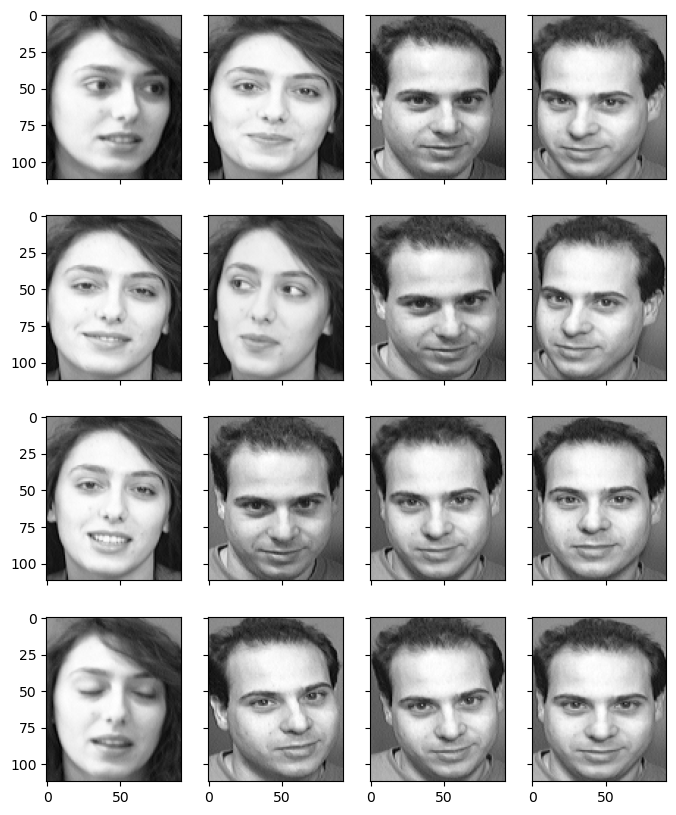

Face image shape: (112, 92)
['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']
Number of classes: 40
Number of images: 400
[1.77824822e-01 1.29057925e-01 6.67093882e-02 5.63561346e-02
 5.13040312e-02 3.39156477e-02 2.47893586e-02 2.27967054e-02
 1.95632067e-02 1.82678428e-02 1.45655853e-02 1.38626271e-02
 1.13318896e-02 1.07267786e-02 9.68365599e-03 9.17860717e-03
 8.60995215e-03 8.21053028e-03 7.36580634e-03 7.01112888e-03
 6.69450840e-03 6.40327943e-03 5.98295099e-03 5.49298705e-03
 5.36083980e-03 4.99408106e-03 4.84854321e-03 4.77687371e-03
 4.50099203e-03 4.35061143e-03 4.27684434e-03 4.05463914e-03
 3.96785012e-03 3.83241704e-03 3.69966355e-03 3.56356652e-03
 3.41269732e-03 3.33215240e-03 3.17642634e-03 3.03400142e-03
 2.97464206e-03 2.91054493e-03 2.86082016e-03 2.78052126e-03
 2.69873388e-03 2.60122139e-03 2.56106677e-03 2.50435737e-03
 2.44154438e-03 2.35425118e-03 2.31772334e-03 2.20335201e-03
 2.18249599e-03 2.16369451e-03 2.11113501e-03 2.05410950e-03
 2.00521036e

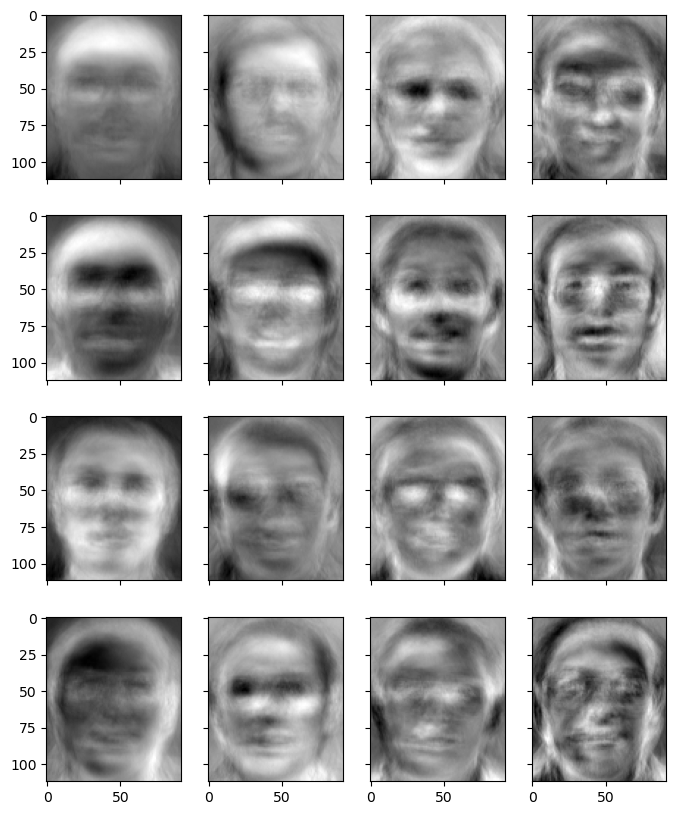

Shape of the weight matrix: (50, 389)
Best match s39 with Euclidean distance 1559.997137


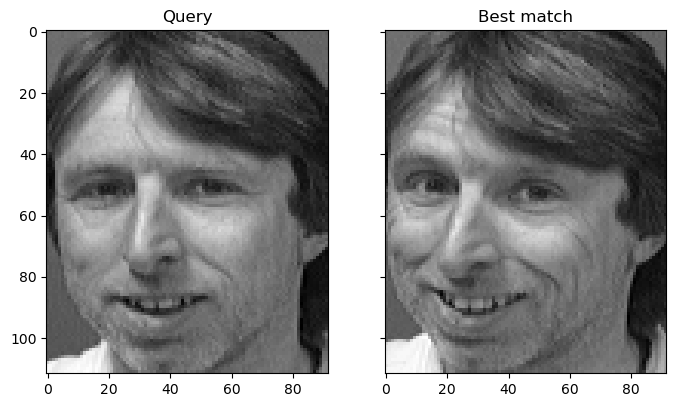

Best match s5 with Euclidean distance 2690.209330


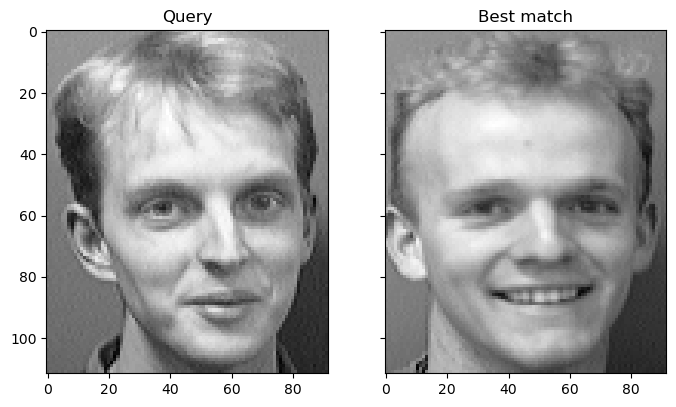

 Thank you!..


In [1]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
# Read face image from zip file on the fly
faces = {}
with zipfile.ZipFile("archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
         

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

...
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

print(list(faces.keys())[:5])

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 1 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
     if key.startswith("s40/"):
        continue # this is our test set
     if key == "s39/10.pgm":
        continue # this is our test set
     facematrix.append(val.flatten())
     facelabel.append(key.split("/")[0])

# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)


print(pca.explained_variance_ratio_)
 
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
 axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()
 
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

 
# Test on out-of-sample image of existing class
query = faces["s39/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()
 
# Test on out-of-sample image of new class
query = faces["s40/4.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()
print (" Thank you!..")